# Mount Google Drive

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip data

In [2]:
import zipfile
import os

# Path to the uploaded ZIP file
zip_path = '/content/drive/MyDrive/T/YoungAffectNet_FER.zip'

# Directory to extract the dataset
data_dir = '/content/Facial_Expressions'

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

# Verify extraction
print(f"Dataset extracted to: {data_dir}")
print("Contents of the dataset:")
print(os.listdir(data_dir))

Dataset extracted to: /content/Facial_Expressions
Contents of the dataset:
['fear', 'disgust', 'anger', 'neutral', 'sad', 'surprise', 'contempt', 'happy']


## Install Dependencies

## Dataset Check And Clean

In [3]:
import os
from PIL import Image

data_dir = "/content/Facial_Expressions"  # Replace with the path to your dataset
output_dir = "/content/Facial_Expressions_Data"  # Path to save the cleaned dataset

# Check directory structure and count the number of images
class_counts = {}
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        valid_images = []

        # Check and process each image
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                # Open the image to check for errors
                with Image.open(img_path) as img:
                    # Resize the image to 224x224
                    img = img.resize((224, 224))

                    # Convert image format to JPG
                    new_img_name = os.path.splitext(img_name)[0] + ".jpg"
                    new_class_path = os.path.join(output_dir, class_name)
                    os.makedirs(new_class_path, exist_ok=True)
                    new_img_path = os.path.join(new_class_path, new_img_name)

                    # Save the processed image
                    img.convert("RGB").save(new_img_path, "JPEG")
                    valid_images.append(new_img_name)
            except Exception as e:
                print(f"Error with image {img_name} in class {class_name}: {e}")

        class_counts[class_name] = len(valid_images)

# Log the number of valid images in each directory
print("Number of valid images in each class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

Number of valid images in each class:
fear: 5015 images
disgust: 4217 images
anger: 5040 images
neutral: 7006 images
sad: 4912 images
surprise: 5890 images
contempt: 4704 images
happy: 6906 images


## Check Dataset Structure

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

data_dir = "/content/Facial_Expressions_Data"  # Replace with the path to your dataset
output_dir = "/content/Facial_Expressions_Split_Data"  # Path to save the split dataset

# Emotion labels with IDs
emotions = {
    "anger": 0,
    "contempt": 1,
    "disgust": 2,
    "fear": 3,
    "happy": 4,
    "neutral": 5,
    "sad": 6,
    "surprise": 7
}

# Create train, val, test directories
splits = ["train", "val", "test"]
for split in splits:
    for emotion in emotions.keys():
        split_dir = os.path.join(output_dir, split, emotion)
        os.makedirs(split_dir, exist_ok=True)

# Split each class into train, val, and test sets
train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

for emotion, emotion_id in emotions.items():
    emotion_dir = os.path.join(data_dir, emotion)
    if os.path.isdir(emotion_dir):
        images = os.listdir(emotion_dir)
        train_images, temp_images = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
        val_images, test_images = train_test_split(temp_images, test_size=(test_ratio / (val_ratio + test_ratio)), random_state=42)

        # Move images to respective directories
        for split, split_images in zip(["train", "val", "test"], [train_images, val_images, test_images]):
            split_dir = os.path.join(output_dir, split, emotion)
            for img_name in split_images:
                src_path = os.path.join(emotion_dir, img_name)
                dest_path = os.path.join(split_dir, img_name)
                shutil.copy(src_path, dest_path)

# Log the distribution of images
for split in splits:
    print(f"\n{split.upper()} SET:")
    for emotion in emotions.keys():
        split_dir = os.path.join(output_dir, split, emotion)
        num_images = len(os.listdir(split_dir))
        print(f"{emotion}: {num_images} images")


TRAIN SET:
anger: 3528 images
contempt: 3292 images
disgust: 2951 images
fear: 3510 images
happy: 4834 images
neutral: 4904 images
sad: 3438 images
surprise: 4123 images

VAL SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 752 images
happy: 1036 images
neutral: 1051 images
sad: 737 images
surprise: 883 images

TEST SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 753 images
happy: 1036 images
neutral: 1051 images
sad: 737 images
surprise: 884 images


In [5]:
# Display 5 sample images from each split
for split in splits:
    print(f"\n{split.upper()} SET SAMPLES:")
    for emotion in emotions.keys():
        split_dir = os.path.join(output_dir, split, emotion)
        sample_images = os.listdir(split_dir)[:5]  # Get first 5 images
        print(f"{emotion}: {sample_images}")
        for img_name in sample_images:
            img_path = os.path.join(split_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    img.show()  # Display the image
            except Exception as e:
                print(f"Error displaying image {img_name}: {e}")


TRAIN SET SAMPLES:
anger: ['image0017334.jpg', 'image0023792.jpg', '5_image0017894.jpg', '5_image0028285.jpg', '5_image0029618.jpg']
contempt: ['image0041744.jpg', 'image0039627.jpg', 'image0039161.jpg', '10_image0030872.jpg', 'image0041474.jpg']
disgust: ['5_image0030373.jpg', '15_image0036565.jpg', 'image0036208.jpg', 'image0041238.jpg', 'image0034981.jpg']
fear: ['image0036773.jpg', '15_image0019938.jpg', '10_image0028262.jpg', '15_image0035072.jpg', 'image0037429.jpg']
happy: ['ffhq_4771.jpg', 'ffhq_1184.jpg', 'ffhq_1516.jpg', 'ffhq_407.jpg', '5_ffhq_4860.jpg']
neutral: ['ffhq_4771.jpg', 'ffhq_1184.jpg', '15_ffhq_462.jpg', 'ffhq_1516.jpg', 'ffhq_407.jpg']
sad: ['image0023655.jpg', 'image0008510.jpg', '15_image0026721.jpg', '15_image0022704.jpg', '10_image0023415.jpg']
surprise: ['image0023703.jpg', 'image0029060.jpg', 'ffhq_407.jpg', 'image0031019.jpg', '15_image0019283.jpg']

VAL SET SAMPLES:
anger: ['image0010836.jpg', 'image0003507.jpg', 'image0023438.jpg', 'image0016348.jpg', 


TRAIN SET SAMPLES:
anger: ['image0017334.jpg', 'image0023792.jpg', '5_image0017894.jpg', '5_image0028285.jpg', '5_image0029618.jpg']


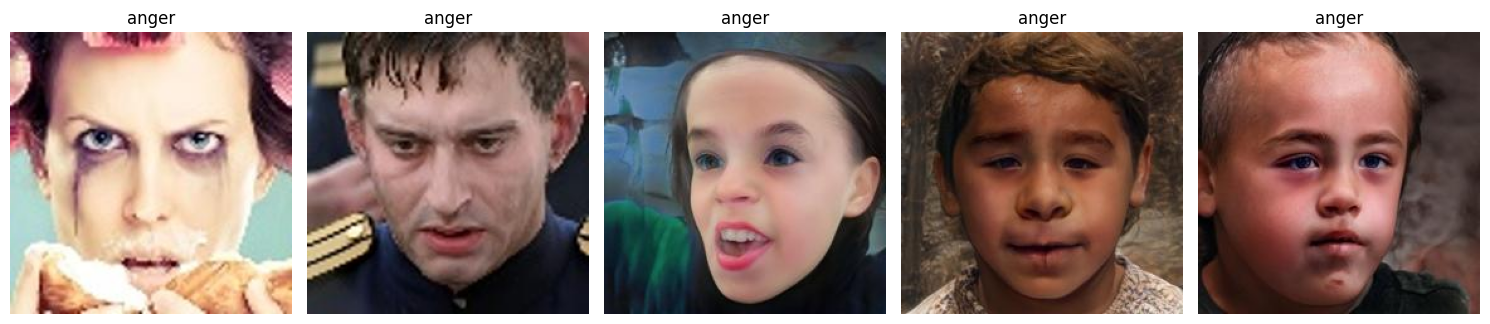

In [8]:
import matplotlib.pyplot as plt
# Display 5 sample images using matplotlib
split_to_display = "train"  # Change to "val" or "test" if needed
print(f"\n{split_to_display.upper()} SET SAMPLES:")
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
axs = axs.flatten()

for emotion in emotions.keys():
    split_dir = os.path.join(output_dir, split_to_display, emotion)
    sample_images = os.listdir(split_dir)[:5]  # Get first 5 images
    print(f"{emotion}: {sample_images}")

    for idx, img_name in enumerate(sample_images[:5]):
        img_path = os.path.join(split_dir, img_name)
        try:
            with Image.open(img_path) as img:
                axs[idx].imshow(img)
                axs[idx].axis('off')
                axs[idx].set_title(emotion)
        except Exception as e:
            print(f"Error displaying image {img_name}: {e}")
    break  # Display only the first 5 images for one emotion

plt.tight_layout()
plt.show()

In [9]:
# Log the distribution of images
for split in splits:
    print(f"\n{split.upper()} SET:")
    for emotion in emotions.keys():
        split_dir = os.path.join(output_dir, split, emotion)
        num_images = len(os.listdir(split_dir))
        print(f"{emotion}: {num_images} images")

# Verify balance and check missing files
for split in splits:
    print(f"\nVERIFYING {split.upper()} SET:")
    for emotion in emotions.keys():
        split_dir = os.path.join(output_dir, split, emotion)
        num_images = len(os.listdir(split_dir))
        print(f"{emotion}: {num_images} images")

        # Check for data augmentation if class is imbalanced
        if num_images < 100:  # Example threshold for imbalance
            print(f"Class {emotion} in {split} is underrepresented. Consider applying data augmentation.")


TRAIN SET:
anger: 3528 images
contempt: 3292 images
disgust: 2951 images
fear: 3510 images
happy: 4834 images
neutral: 4904 images
sad: 3438 images
surprise: 4123 images

VAL SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 752 images
happy: 1036 images
neutral: 1051 images
sad: 737 images
surprise: 883 images

TEST SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 753 images
happy: 1036 images
neutral: 1051 images
sad: 737 images
surprise: 884 images

VERIFYING TRAIN SET:
anger: 3528 images
contempt: 3292 images
disgust: 2951 images
fear: 3510 images
happy: 4834 images
neutral: 4904 images
sad: 3438 images
surprise: 4123 images

VERIFYING VAL SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 752 images
happy: 1036 images
neutral: 1051 images
sad: 737 images
surprise: 883 images

VERIFYING TEST SET:
anger: 756 images
contempt: 706 images
disgust: 633 images
fear: 753 images
happy: 1036 images
neutral: 1051 images
sad: 737 im

In [10]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories
data_dir = "/content/Facial_Expressions_Split_Data"  # Replace with the path to your dataset
output_dir = "/content/Processed_Facial_Expressions_Data_Au"  # Path to save the processed dataset

# Emotion labels with IDs
emotions = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Parameters
img_size = (224, 224)  # Target size for resizing

def preprocess_and_augment(data_dir, output_dir, emotions, img_size):
    os.makedirs(output_dir, exist_ok=True)

    # Data Augmentation setup
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    for split in ["train", "val", "test"]:
        split_dir = os.path.join(data_dir, split)
        output_split_dir = os.path.join(output_dir, split)
        os.makedirs(output_split_dir, exist_ok=True)

        for emotion in emotions:
            emotion_dir = os.path.join(split_dir, emotion)
            output_emotion_dir = os.path.join(output_split_dir, emotion)
            os.makedirs(output_emotion_dir, exist_ok=True)

            images = os.listdir(emotion_dir)
            for img_name in images:
                img_path = os.path.join(emotion_dir, img_name)
                try:
                    # Open and resize the image
                    with Image.open(img_path) as img:
                        img = img.resize(img_size).convert("RGB")
                        img_array = np.array(img) / 255.0  # Scale pixel values to [0, 1]

                        # Save the processed image
                        output_path = os.path.join(output_emotion_dir, img_name)
                        img.save(output_path, "JPEG")

                        # Apply augmentation only for the training set
                        if split == "train":
                            img_array = img_array.reshape((1,) + img_array.shape)
                            aug_iter = datagen.flow(img_array, batch_size=1, save_to_dir=output_emotion_dir,
                                                    save_prefix="aug", save_format="jpeg")
                            # Generate a few augmented images
                            for _ in range(5):
                                next(aug_iter)

                except Exception as e:
                    print(f"Error processing image {img_name}: {e}")

# Run preprocessing and augmentation
preprocess_and_augment(data_dir, output_dir, emotions, img_size)

print("Data preprocessing and augmentation complete.")

Data preprocessing and augmentation complete.


In [12]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directories
data_dir = "/content/Processed_Facial_Expressions_Data_Au"  # Replace with the path to your dataset

# Parameters
img_size = (224, 224)  # Target size for resizing

# Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def plot_augmented_images(emotion, num_samples=5):
    emotion_dir = os.path.join(data_dir, "train", emotion)
    images = os.listdir(emotion_dir)[:num_samples]

    for img_name in images:
        img_path = os.path.join(emotion_dir, img_name)
        try:
            with Image.open(img_path) as img:
                img = img.resize(img_size).convert("RGB")
                img_array = np.array(img) / 255.0
                img_array = img_array.reshape((1,) + img_array.shape)

                # Plot original and augmented images
                fig, axs = plt.subplots(1, 6, figsize=(15, 5))
                axs[0].imshow(img)
                axs[0].axis('off')
                axs[0].set_title("Original")

                aug_iter = datagen.flow(img_array, batch_size=1)
                for i in range(5):
                    aug_image = next(aug_iter)[0]
                    axs[i + 1].imshow(aug_image)
                    axs[i + 1].axis('off')
                    axs[i + 1].set_title(f"Aug {i+1}")

                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error processing image {img_name}: {e}")

# Example usage: Plot augmented images for the "happy" emotion
plot_augmented_images("happy")

Output hidden; open in https://colab.research.google.com to view.

In [13]:
import torch
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from PIL import Image
import os
import numpy as np

# Directories
data_dir = "/content/Processed_Facial_Expressions_Data_Au"
model_save_path = "/content/vit_emotion_model.pth"

# Parameters
img_size = (224, 224)
batch_size = 16
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Emotion labels
emotions = ["anger", "contempt", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Feature extractor
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")

# Custom Dataset class
class EmotionDataset(Dataset):
    def __init__(self, data_dir, split, transform):
        self.data_dir = os.path.join(data_dir, split)
        self.transform = transform
        self.samples = []
        for label, emotion in enumerate(emotions):
            emotion_dir = os.path.join(self.data_dir, emotion)
            for img_name in os.listdir(emotion_dir):
                self.samples.append((os.path.join(emotion_dir, img_name), label))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, label = self.samples[idx]
        with Image.open(img_path) as img:
            img = img.convert("RGB")
            img = self.transform(img)
        return img, label

# Data transformations
transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])

# Dataloaders
train_dataset = EmotionDataset(data_dir, "train", transform)
val_dataset = EmotionDataset(data_dir, "val", transform)
test_dataset = EmotionDataset(data_dir, "test", transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load pre-trained ViT model
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(emotions)
)
model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)

# Training loop
best_val_loss = float('inf')
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss/len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss}")
    print(classification_report(all_labels, all_preds, target_names=emotions))

    # Save the model if validation loss improves
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved to {model_save_path}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 1/10, Train Loss: 1.1121527323617826
Validation Loss: 0.920302451174797
              precision    recall  f1-score   support

       anger       0.49      0.53      0.51       756
    contempt       0.72      0.61      0.66       706
     disgust       0.59      0.45      0.51       633
        fear       0.58      0.49      0.53       752
       happy       0.97      0.84      0.90      1036
     neutral       0.85      0.92      0.88      1051
         sad       0.54      0.55      0.54       737
    surprise       0.54      0.73      0.62       883

    accuracy                           0.67      6554
   macro avg       0.66      0.64      0.64      6554
weighted avg       0.68      0.67      0.67      6554

Model saved to /content/vit_emotion_model.pth


<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 2/10, Train Loss: 0.6970558271954538
Validation Loss: 0.9138680732536425
              precision    recall  f1-score   support

       anger       0.43      0.66      0.52       756
    contempt       0.74      0.62      0.68       706
     disgust       0.63      0.47      0.53       633
        fear       0.54      0.60      0.57       752
       happy       0.93      0.90      0.91      1036
     neutral       0.86      0.90      0.88      1051
         sad       0.65      0.44      0.53       737
    surprise       0.60      0.63      0.61       883

    accuracy                           0.68      6554
   macro avg       0.67      0.65      0.65      6554
weighted avg       0.69      0.68      0.68      6554

Model saved to /content/vit_emotion_model.pth


<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 3/10, Train Loss: 0.3948689189349069
Validation Loss: 0.9979410297010185
              precision    recall  f1-score   support

       anger       0.52      0.58      0.55       756
    contempt       0.67      0.72      0.69       706
     disgust       0.63      0.52      0.57       633
        fear       0.62      0.54      0.58       752
       happy       0.94      0.89      0.91      1036
     neutral       0.86      0.91      0.88      1051
         sad       0.56      0.58      0.57       737
    surprise       0.60      0.64      0.62       883

    accuracy                           0.69      6554
   macro avg       0.68      0.67      0.67      6554
weighted avg       0.70      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 4/10, Train Loss: 0.18543530846133124
Validation Loss: 1.191046784282378
              precision    recall  f1-score   support

       anger       0.54      0.53      0.53       756
    contempt       0.71      0.69      0.70       706
     disgust       0.59      0.57      0.58       633
        fear       0.55      0.58      0.57       752
       happy       0.95      0.87      0.91      1036
     neutral       0.82      0.92      0.87      1051
         sad       0.60      0.58      0.59       737
    surprise       0.60      0.61      0.60       883

    accuracy                           0.69      6554
   macro avg       0.67      0.67      0.67      6554
weighted avg       0.69      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 5/10, Train Loss: 0.09787169714016934
Validation Loss: 1.3673738907972952
              precision    recall  f1-score   support

       anger       0.57      0.56      0.56       756
    contempt       0.71      0.65      0.68       706
     disgust       0.64      0.49      0.56       633
        fear       0.59      0.56      0.57       752
       happy       0.96      0.86      0.90      1036
     neutral       0.80      0.93      0.86      1051
         sad       0.52      0.65      0.58       737
    surprise       0.61      0.61      0.61       883

    accuracy                           0.69      6554
   macro avg       0.67      0.66      0.67      6554
weighted avg       0.69      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 6/10, Train Loss: 0.06660680522398528
Validation Loss: 1.4565765903558492
              precision    recall  f1-score   support

       anger       0.53      0.60      0.56       756
    contempt       0.72      0.66      0.69       706
     disgust       0.61      0.53      0.57       633
        fear       0.59      0.52      0.56       752
       happy       0.93      0.89      0.91      1036
     neutral       0.85      0.89      0.87      1051
         sad       0.62      0.53      0.57       737
    surprise       0.55      0.70      0.62       883

    accuracy                           0.69      6554
   macro avg       0.67      0.66      0.67      6554
weighted avg       0.69      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 7/10, Train Loss: 0.052395763307913144
Validation Loss: 1.5099198487443883
              precision    recall  f1-score   support

       anger       0.57      0.54      0.56       756
    contempt       0.70      0.69      0.70       706
     disgust       0.62      0.55      0.58       633
        fear       0.58      0.53      0.55       752
       happy       0.92      0.90      0.91      1036
     neutral       0.88      0.86      0.87      1051
         sad       0.65      0.54      0.59       737
    surprise       0.51      0.73      0.60       883

    accuracy                           0.69      6554
   macro avg       0.68      0.67      0.67      6554
weighted avg       0.70      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 8/10, Train Loss: 0.04245350876237003
Validation Loss: 1.6113205417753595
              precision    recall  f1-score   support

       anger       0.52      0.60      0.56       756
    contempt       0.75      0.61      0.67       706
     disgust       0.64      0.53      0.58       633
        fear       0.51      0.64      0.57       752
       happy       0.93      0.89      0.91      1036
     neutral       0.84      0.90      0.87      1051
         sad       0.60      0.53      0.56       737
    surprise       0.62      0.60      0.61       883

    accuracy                           0.69      6554
   macro avg       0.68      0.66      0.67      6554
weighted avg       0.69      0.69      0.69      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 9/10, Train Loss: 0.039099142280882786
Validation Loss: 1.6537124842141966
              precision    recall  f1-score   support

       anger       0.59      0.46      0.52       756
    contempt       0.72      0.65      0.68       706
     disgust       0.61      0.51      0.55       633
        fear       0.57      0.57      0.57       752
       happy       0.91      0.90      0.90      1036
     neutral       0.84      0.89      0.87      1051
         sad       0.50      0.68      0.58       737
    surprise       0.60      0.61      0.61       883

    accuracy                           0.68      6554
   macro avg       0.67      0.66      0.66      6554
weighted avg       0.69      0.68      0.68      6554



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Epoch 10/10, Train Loss: 0.03338282844701214
Validation Loss: 1.6847002601324121
              precision    recall  f1-score   support

       anger       0.51      0.64      0.57       756
    contempt       0.70      0.69      0.70       706
     disgust       0.50      0.65      0.57       633
        fear       0.59      0.56      0.57       752
       happy       0.93      0.89      0.91      1036
     neutral       0.87      0.87      0.87      1051
         sad       0.63      0.50      0.56       737
    surprise       0.64      0.56      0.60       883

    accuracy                           0.69      6554
   macro avg       0.67      0.67      0.67      6554
weighted avg       0.69      0.69      0.69      6554



In [14]:
# Testing
model.eval()
all_preds, all_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs).logits
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print("Test Results:")
print(classification_report(all_labels, all_preds, target_names=emotions))

<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


Test Results:
              precision    recall  f1-score   support

       anger       0.53      0.60      0.56       756
    contempt       0.68      0.67      0.68       706
     disgust       0.47      0.64      0.55       633
        fear       0.57      0.53      0.55       753
       happy       0.94      0.91      0.92      1036
     neutral       0.87      0.89      0.88      1051
         sad       0.64      0.52      0.58       737
    surprise       0.62      0.53      0.57       884

    accuracy                           0.68      6556
   macro avg       0.67      0.66      0.66      6556
weighted avg       0.69      0.68      0.68      6556



<ipython-input-13-ab81ec8afb21>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transform = lambda x: torch.tensor(feature_extractor(images=x, return_tensors="pt")['pixel_values'][0])


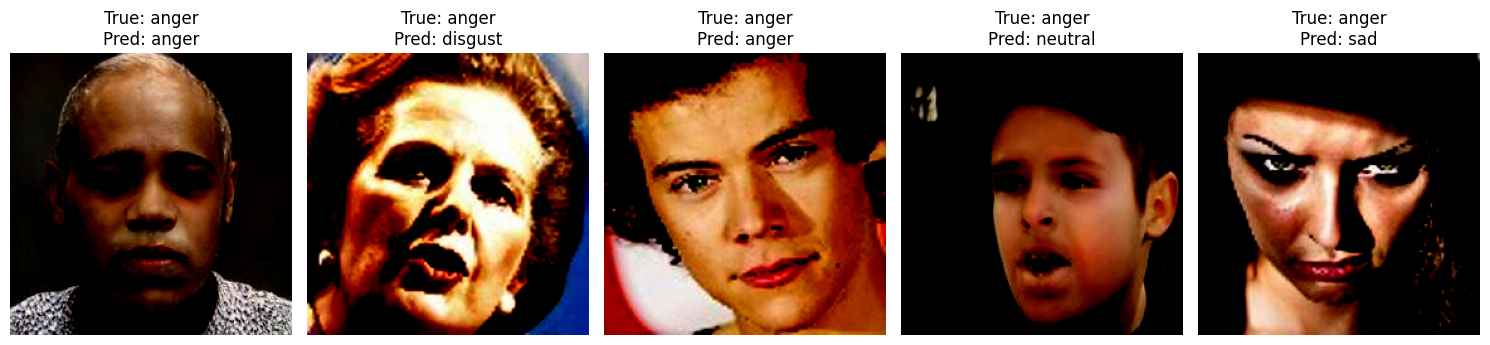

In [15]:
# Predict and display a few images from the test set
num_samples = 5
sample_imgs, sample_labels = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        sample_imgs.extend(imgs.cpu().numpy())
        sample_labels.extend(labels.cpu().numpy())
        if len(sample_imgs) >= num_samples:
            break

# Display images with predictions
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    img = sample_imgs[i].transpose(1, 2, 0)  # Convert from (C, H, W) to (H, W, C)
    true_label = emotions[sample_labels[i]]
    pred_label = emotions[all_preds[i]]

    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"True: {true_label}\nPred: {pred_label}")

plt.tight_layout()
plt.show()